In [52]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import torch
from torch import nn, optim
import torchvision
from sklearn.model_selection import train_test_split

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3060 Laptop GPU'

# Data Loading

## Getting images

In [3]:
image_dir = "/home/zekeri/Documents/Ecole_IA/medical_MNIST/Medical-MNIST-Classification/resized"

In [4]:
image_dirnames = os.listdir(image_dir)
classes = image_dirnames.copy()

In [33]:
data = {
    "image_paths" : [],
    "label" : []
}
for dir_name in image_dirnames:
    dir_path = os.path.join(image_dir, dir_name)
    for filename in os.listdir(dir_path):
        file_path = os.path.join(dir_path, filename)
        data["image_paths"].append(file_path)
        data["label"].append(dir_name)

## Printing samples

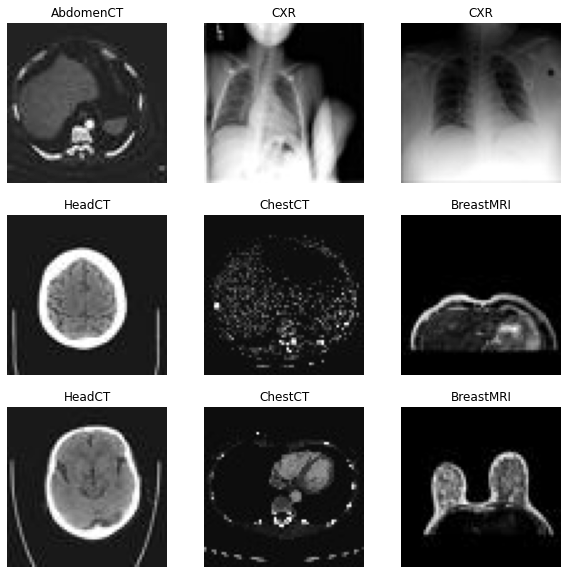

In [35]:
plt.figure(figsize = (10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(data["image_paths"]))

    image_path = data["image_paths"][index]
    label = data["label"][index]
    image = Image.open(image_path)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    plt.axis("off")

## Dataset loader

In [ ]:
class MNISTDataset(torch.utils.data.Dataset):

    def __init__(self, image_paths, labels, transform = None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        image = Image.open(self.image_paths[[idx]])
        raw_label = self.labels[idx]


# Pre-Processing

All images are normalized to help the performance of the model

## Train / test split

In [58]:
test_split = 0.3

train_data, test_data = train_test_split(pd.DataFrame(data), test_size = test_split, stratify = data["label"])

In [66]:
train_data

,image_paths,label
5475,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,ChestCT
53615,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,BreastMRI
30814,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,Hand
3042,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,ChestCT
39320,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,Hand
...,...,...
32057,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,Hand
36216,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,Hand
2590,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,ChestCT
40028,/home/zekeri/Documents/Ecole_IA/medical_MNIST/...,AbdomenCT


# Building model

## Transfert learning - VGG

In [82]:
class MedicalVGG(nn.Module):

    def __init__(self):
        super().__init__()

        # Load VGG architecture with pretrained weights
        vgg = torchvision.models.vgg16(pretrained=True)

        # Add an input layer
        self.input = nn.Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

        # Get feature map layers and average pooling
        self.features = vgg.features
        self.avgpool = vgg.avgpool
        
        # Get classifier without output layer
        classifier = list(vgg.classifier.children())[:-1]
        self.classifier = nn.Sequential(*classifier)

        # Add final layer
        num_classifier = vgg.classifier[-1].in_features
        self.output = nn.Linear(num_classifier, len(classes))

        # Freeze feature layers
        for name, param in self.named_parameters():
            if "features" in name:
                param.requires_grad = False
    
    def forward(self, x):
        x = self.input(x)
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        x = self.output(x)
        return x

In [84]:
vgg = MedicalVGG()

In [28]:
def train_model(model, criterion, optimizer, epochs):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        print("-"*10)

        model.train()
        train_loss = 0


In [30]:
torchvision.models.vgg.VGG

torchvision.models.vgg.VGG

In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg.parameters(), lr = 0.001)
epochs = 20

train_model(vgg, criterion, optimizer, epochs)

NameError: name 'train_model' is not defined